<a href="https://colab.research.google.com/github/NimishMalhotra/ClassifyingAnimalsCNN/blob/master/Cats_Dogs_Human_Horses_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

sample_data


In [2]:
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

--2020-07-27 06:17:56--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2020-07-27 06:17:57--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc867e8d839cc1788be4b5a4252.dl.dropboxusercontent.com/zip_download_get/Afsz53fqMLef48yrfCulAFwI53wDpaSsnkmSQO-y-0h5JUN-39qjVzySJBI0LrHy8rX3wgPhu3bPAUYu3I1_oQoNoyqfvg7oTXq_sdyDz6g6PA [following]
--2020-07-27 06:17:58--  https://ucc867e8d839cc1788be4b5a4252.dl.dropboxusercontent.com/zip_download_get/Afsz53fqMLef48yrfCulAFwI53wDpaSsnkmSQO-y-0h5JUN-39qjVzySJBI0LrHy8rX3wgPhu3bPAUYu3I1_

In [3]:
!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0
mapname:  conversion of  failed
   creating: Images/
   creating: Images/cats/
   creating: Images/dogs/
   creating: Images/horses/
   creating: Images/humans/
 extracting: Images/cats/cat.3.jpg   
 extracting: Images/dogs/dog.3.jpg   
 extracting: Images/cats/cat.8.jpg   
 extracting: Images/dogs/dog.8.jpg   
 extracting: Images/cats/cat.5.jpg   
 extracting: Images/dogs/dog.5.jpg   
 extracting: Images/cats/cat.6.jpg   
 extracting: Images/dogs/dog.2.jpg   
 extracting: Images/dogs/dog.9.jpg   
 extracting: Images/dogs/dog.4.jpg   
 extracting: Images/cats/cat.1.jpg   
 extracting: Images/cats/cat.9.jpg   
 extracting: Images/dogs/dog.7.jpg   
 extracting: Images/cats/cat.4.jpg   
 extracting: Images/dogs/dog.6.jpg   
 extracting: Images/cats/cat.7.jpg   
 extracting: Images/dogs/dog.1.jpg   
 extracting: Images/cats/cat.2.jpg   
 extracting: Images/dogs/dog.82.jpg  
 extracting: Images/cats/cat.75.jpg  
 extracting: Images/cats/cat.45.jpg  


In [4]:
# To see where the data is
# For every command in terminal put ! in front to execute in jupyter notebook

!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data


In [5]:
import os,shutil
os.listdir('Images') # These are the folders

['dogs', 'cats', 'horses', 'humans']

In [6]:
folders = os.listdir('Images')

In [13]:
# Iterate over the folders

for f in folders:
  path = 'Images/' + f
  print(f+ " "+str(len(os.listdir(path)))) # Tell all files inside all the folders

dogs 181
cats 181
horses 181
humans 181


In [14]:
new_folder = os.listdir('val_images')

for f in new_folder:
    path = 'val_images/' + f
    print(f+" " + str(len(os.listdir(path))))

dogs 21
cats 21
horses 21
humans 21


In [8]:
if not os.path.isdir("val_images"):
    os.mkdir('val_images')

classes = ['dogs', 'cats', 'horses', 'humans']
!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data   val_images


In [9]:
# We need to create subfolders inside the validation folder of images-> separate folder for cats,dogs,..
for c in classes:
    p = os.path.join('val_images',c)  # val_images/dogs or val_images/cats
    if not os.path.isdir(p):
        os.mkdir(p)

In [12]:
SPLIT = 0.9

for f in os.listdir('Images'):
    path = 'Images/' + f
    imgs = os.listdir(path)
    split_size = int(SPLIT*len(imgs))
    files_to_move = imgs[split_size:]
    print(len(files_to_move))

    for img_f in files_to_move:
        src = os.path.join(path,img_f)  # To put '/'
        dest = os.path.join('val_images/'+f,img_f)
        shutil.move(src,dest)


21
21
21
21


In [ ]:
# We have 202 images for each class
# Display an image

In [15]:
from keras.preprocessing import image
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [ ]:
sample_path = 'Images/cats/cat.1.jpg'
img = image.load_img(sample_path)
print(type(img)) # It is of type image. So to display it using matplotlib we need to convert this image to array

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [ ]:
x = image.img_to_array(img)/255.0  # To make sure it is in the range 0-1

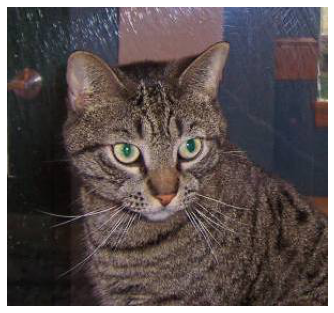

In [ ]:
plt.style.use('seaborn')
plt.imshow(x)
plt.axis('off')
plt.show()

In [16]:
# Build a Model - This dataset is more complex than MNIST dataset
from keras.layers import *
from keras.models import Sequential

In [38]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [18]:
# Compile Model -> Optimizer, Loss, Metrics
from keras import optimizers

In [19]:
adam = optimizers.adam(learning_rate=1e-4) # 10^-4

In [39]:
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [ ]:
# Train Model - 2 Methods

# model.fit(_______) # This method is generally used when the dataset is small and it can fit inside the memory completely. Our dataset is also small.
# Another method is based upon generators.
# Load only single batch of data into the memory, feed it to the model, then we will load the next batch and previous batch is cleaned from the memory.

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [22]:
train_gen = ImageDataGenerator(rescale=1.0/255) # This transformation should be applied to each image, divide each pixel by 255

train_generator = train_gen.flow_from_directory(
    'Images/',
    target_size = (150,150),
    batch_size=32,
    class_mode='categorical' # for labelling 
)

Found 724 images belonging to 4 classes.


In [23]:
val_gen = ImageDataGenerator(rescale=1.0/255) # This transformation should be applied to each image, divide each pixel by 255

val_generator = val_gen.flow_from_directory(
    'val_images/',
    target_size = (150,150),
    batch_size=32,
    class_mode='categorical' # for labelling 
)

Found 84 images belonging to 4 classes.


In [ ]:
print(train_generator.labels)
print(len(train_generator.labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
train_generator.next() # this gives you data for the next batch

(array([[[[0.6784314 , 0.85098046, 0.9960785 ],
          [0.68235296, 0.854902  , 1.        ],
          [0.6862745 , 0.85098046, 1.        ],
          ...,
          [0.7058824 , 0.854902  , 1.        ],
          [0.7058824 , 0.854902  , 1.        ],
          [0.7058824 , 0.854902  , 1.        ]],
 
         [[0.6784314 , 0.85098046, 0.9960785 ],
          [0.6784314 , 0.85098046, 0.9960785 ],
          [0.6862745 , 0.85098046, 1.        ],
          ...,
          [0.7058824 , 0.854902  , 1.        ],
          [0.7058824 , 0.854902  , 1.        ],
          [0.7058824 , 0.854902  , 1.        ]],
 
         [[0.6745098 , 0.8470589 , 1.        ],
          [0.6784314 , 0.85098046, 0.9960785 ],
          [0.6784314 , 0.85098046, 0.9960785 ],
          ...,
          [0.7019608 , 0.85098046, 0.9960785 ],
          [0.7019608 , 0.85098046, 0.9960785 ],
          [0.7019608 , 0.85098046, 0.9960785 ]],
 
         ...,
 
         [[0.32156864, 0.5803922 , 0.16470589],
          [0.26274

In [ ]:
x,y = train_generator.next()

In [ ]:
print(x.shape)
print(y.shape)

(32, 150, 150, 3)
(32, 4)


In [ ]:
# It is generating a mini batch of size 32. Each image is of size (150,150,3) where 3 is no. of channels -> RGB image
# Each label is now a one-hot vector
# While fitting our model we will loop over mutiple batches

In [ ]:
# Ierate over the entire training dataset

for x,y in train_generator:
  print(x.shape)
  print(y.shape)
  break

(32, 150, 150, 3)
(32, 4)


In [ ]:
# Train our Model
# Validation data can be either a fixed dataset or a generator like we are giving for training part
#model.fit_generator

In [40]:
history = model.fit_generator(
    
    train_generator,
    epochs=60,
    steps_per_epoch=25,
    validation_data = val_generator,
    validation_steps = 4
)

Epoch 1/60
25/25 [==============================] - 3s 131ms/step - loss: 1.3471 - accuracy: 0.3299 - val_loss: 1.4681 - val_accuracy: 0.4655
Epoch 2/60
25/25 [==============================] - 3s 117ms/step - loss: 1.1047 - accuracy: 0.5528 - val_loss: 1.0257 - val_accuracy: 0.5862
Epoch 3/60
25/25 [==============================] - 3s 112ms/step - loss: 0.9997 - accuracy: 0.5650 - val_loss: 1.0332 - val_accuracy: 0.5385
Epoch 4/60
25/25 [==============================] - 3s 113ms/step - loss: 0.9445 - accuracy: 0.6231 - val_loss: 0.8101 - val_accuracy: 0.5862
Epoch 5/60
25/25 [==============================] - 3s 109ms/step - loss: 0.7762 - accuracy: 0.6739 - val_loss: 0.6175 - val_accuracy: 0.6638
Epoch 6/60
25/25 [==============================] - 3s 112ms/step - loss: 0.6945 - accuracy: 0.7322 - val_loss: 0.6914 - val_accuracy: 0.5769
Epoch 7/60
25/25 [==============================] - 3s 108ms/step - loss: 0.7318 - accuracy: 0.7010 - val_loss: 0.6444 - val_accuracy: 0.7155
Epoch 

In [27]:
history.history

{'accuracy': [0.27664974,
  0.3185279,
  0.43814433,
  0.555,
  0.54695433,
  0.6104061,
  0.62371135,
  0.677665,
  0.67639595,
  0.6611675,
  0.7182741,
  0.72715735,
  0.74873096,
  0.75386596,
  0.7775,
  0.8058376,
  0.81572163,
  0.7715736,
  0.8324873,
  0.82375,
  0.87628865,
  0.88071066,
  0.86675125,
  0.86928934,
  0.9086294,
  0.9137056,
  0.939433,
  0.9454315,
  0.955,
  0.90335053,
  0.9441624,
  0.9682741,
  0.975,
  0.9806701,
  0.9758883,
  0.97969544,
  0.9845361,
  0.99125,
  0.9885787,
  0.98840207],
 'loss': [1.382188753428193,
  1.355791712170325,
  1.2837753406504995,
  1.1091928195953369,
  1.0754460737789948,
  0.9620418279304117,
  0.9439439874948915,
  0.8539098119977767,
  0.8039377640346586,
  0.8233832008947576,
  0.7266791898587028,
  0.6974349793443825,
  0.6555605757660067,
  0.6093659640587482,
  0.5547013223171234,
  0.5506180267648648,
  0.4779306593322262,
  0.5736551451198946,
  0.46797043962527046,
  0.44604998469352725,
  0.3888451924029085,
  

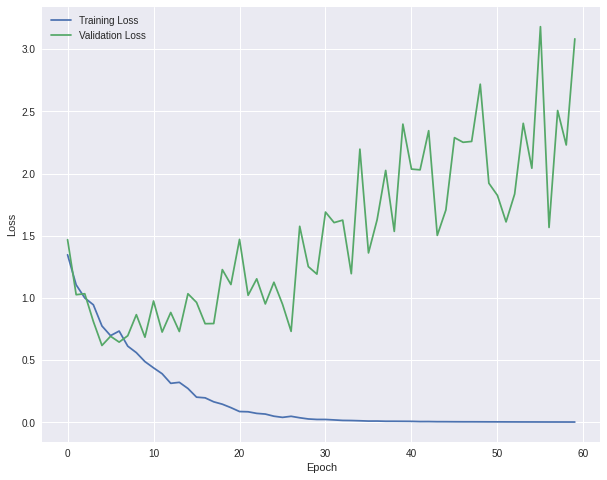

In [41]:
plt.figure(figsize=(10,8))
plt.style.use('seaborn')
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

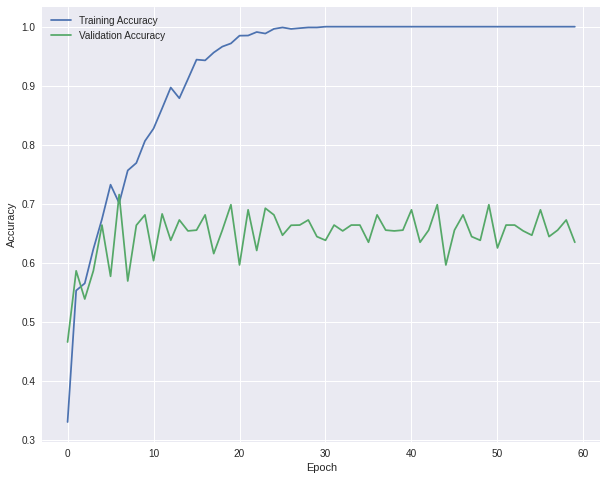

In [42]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()